In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt
#import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("C://Users//DPR//Desktop//New Researchers//GITHUB//cell_images"))
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
import seaborn as sns; sns.set()
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

['.ipynb_checkpoints', 'cell_images', 'Logistic Regression.ipynb', 'Parasitized', 'Uninfected', 'Untitled.ipynb', 'Untitled1.ipynb']


In [2]:
x = list() #create x data
y = list() # create y data
for i in os.listdir("C://Users//DPR//Desktop//New Researchers//GITHUB//cell_images//Parasitized"): #read all parasitized data 
    if ".png" in i: #this if block for only read .png files
        path = "C://Users//DPR//Desktop//New Researchers//GITHUB//cell_images//Parasitized/"+i # create path
        img = plt.imread(path) # and read created path
        img = cv2.resize(img,(40,40)) # resize image for lower processing power
        x.append(img) # append image to x data
        y.append(1) 
for i in os.listdir("C://Users//DPR//Desktop//New Researchers//GITHUB//cell_images//Uninfected"):
    if ".png" in i:
        path = "C://Users//DPR//Desktop//New Researchers//GITHUB//cell_images//Uninfected/"+i
        img = plt.imread(path)
        img = cv2.resize(img,(40,40))
        x.append(img)
        y.append(0)
x = np.array(x)  
x = x.reshape(x.shape[0],x.shape[1]*x.shape[2]*x.shape[3])
x = x**8

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [15]:
model_dt = DecisionTreeClassifier()
clf = model_dt.fit(x_train, y_train)

y_testp_proba_dt=clf.predict_proba(x_test)
y_testp_dt=clf.predict(x_test)
y_trainp_dt=clf.predict(x_train)
y_trainp_proba_dt=clf.predict_proba(x_train)

In [16]:
cm=confusion_matrix(y_test,y_testp_dt)

In [17]:
cm

array([[1959,  756],
       [ 953, 1844]], dtype=int64)

In [18]:
acc=accuracy_score(y_test,y_testp_dt)
print ('Accuracy: {:.4%}'.format(acc))

Accuracy: 68.9949%


In [19]:
ll=log_loss(y_test,y_testp_proba_dt)
print ('Log Loss: {:.6}'.format(ll))

Log Loss: 10.7088


In [20]:
pd.DataFrame(cm)

,0,1
0,1959,756
1,953,1844


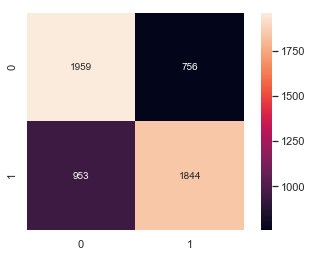

In [21]:
sns.heatmap(cm, square=True, annot=True,fmt='-d')

In [22]:
print(classification_report(y_test,y_testp_dt))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      2715
           1       0.71      0.66      0.68      2797

   micro avg       0.69      0.69      0.69      5512
   macro avg       0.69      0.69      0.69      5512
weighted avg       0.69      0.69      0.69      5512

